In [ ]:
import pandas as pd
import tensorflow as tf

In [100]:
df = pd.read_csv('dev.csv')
df = df.iloc[:,1:]
df.head(5)

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Corr4,Diss_sim4,Homogen4,Contrast4,Energy5,Corr5,Diss_sim5,Homogen5,Contrast5,languages
0,0.583967,0.975496,9.404243,0.800701,616.918643,0.537251,0.836165,27.847425,0.714304,4132.026649,...,1,0,1,0,0.607864,1,0,1,0,Bengali
1,0.509047,0.967128,12.441789,0.753983,879.054381,0.442463,0.781184,37.348783,0.644560,5857.093812,...,1,0,1,0,0.543320,1,0,1,0,Bengali
2,0.547644,0.974732,10.141636,0.778776,631.485478,0.495706,0.823576,30.401309,0.684403,4413.912024,...,1,0,1,0,0.574141,1,0,1,0,Bengali
3,0.559575,0.975192,9.733793,0.800335,658.681863,0.511135,0.834312,28.922338,0.713047,4394.650259,...,1,0,1,0,0.584557,1,0,1,0,Bengali
4,0.675394,0.969754,8.110708,0.851848,616.763526,0.637400,0.807739,24.283581,0.781797,3936.207958,...,1,0,1,0,0.694929,1,0,1,0,Bengali


In [ ]:
## Doing some eda

<h1> BASIC NEURAL NET  FOR CLASSIICATION
 </h1>

In [ ]:
import tensorflow as tf
from tensorflow import keras

#helper library
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#Dataset

In [ ]:
fasion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_label) = fasion_mnist.load_data()  #split into

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

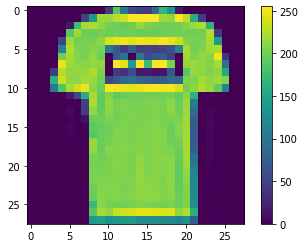

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scaling the images

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
28*28

784

NEURAL NET

In [63]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='tanh'),
                          keras.layers.Dense(10,activation='softmax')
])

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [65]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4770 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3324 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

## INDIC DATA


In [101]:
X = df.iloc[:,:-1].values

In [102]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df.iloc[:,-1])
y = df['label'].values

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [105]:
X_test

array([[ 0.55507364,  0.97185825, 10.76665135, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66153561,  0.98669036,  5.20056679, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55885905,  0.9677175 , 10.92447917, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59756594,  0.98030914,  8.48246017, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56470261,  0.98692179,  7.09947917, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54392862,  0.96674304, 12.639231  , ...,  0.        ,
         1.        ,  0.        ]])